# Assignment 5 – Machine Learning in R

**Author**: David  
**Date**: July 24, 2025  
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using `caret` and `tidyverse`, including data loading, exploratory data analysis, model training, evaluation, and prediction using the Iris dataset.  
Adapted from Jason Brownlee’s tutorial: https://machinelearningmastery.com/machine-learning-in-r-step-by-step/

## 1. Create a Conda Environment with R and Caret
### 1.1 Load Packages

In [12]:
install.packages("caret")
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## 2. Load The Data
We are going to use the iris flowers dataset. This dataset is famous because it is used as the “hello world” dataset in machine learning and statistics by pretty much everyone.

The dataset contains 150 observations of iris flowers. There are four columns of measurements of the flowers in centimeters. The fifth column is the species of the flower observed. All observed flowers belong to one of three species.

Here is what we are going to do in this step:  
1. Load the iris data the easy way.
2. Load the iris data from CSV (optional, for purists).
3. Separate the data into a training dataset and a validation dataset.

Choose your preferred way to load data or try both methods.

### 2.1 Load Data The Easy Way
Fortunately, the R platform provides the iris dataset for us. Load the dataset as follows:

In [14]:
# attach the iris dataset to the environment
data(iris)

# rename the dataset
dataset <- iris

You now have the iris data loaded in R and accessible via the dataset variable.

### 2.2 Load From CSV
Maybe your a purist and you want to load the data just like you would on your own machine learning project, from a CSV file.  
1. Download the iris dataset from the UCI Machine Learning Repository.
2. Save the file as iris.csv your project directory.

Load the dataset from the CSV file as follows:

In [6]:
# define the filename
filename <- "iris.csv"

# load the CSV file from the local directory
dataset <- read.csv(filename, header=FALSE)

# set the column names in the dataset
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

You now have the iris data loaded in R and accessible via the dataset variable.

### 2.3. Create a Validation Dataset
We need to know that the model we created is any good.

Later, we will use statistical methods to estimate the accuracy of the models that we create on unseen data. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

That is, we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea of how accurate the best model might actually be.

We will split the loaded dataset into two, 80% of which we will use to train our models and 20% that we will hold back as a validation dataset.

In [15]:
# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)

# select 20% of the data for validation
validation <- dataset[-validation_index,]

# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

You now have training data in the dataset variable and a validation set we will use later in the validation variable.

Note that we replaced our dataset variable with the 80% sample of the dataset. This was an attempt to keep the rest of the code simpler and readable.

## 3. Summarize Dataset
Now it is time to take a look at the data.

In this step we are going to take a look at the data a few different ways:  
1. Dimensions of the dataset.
2. Types of the attributes.
3. Peek at the data itself.
4. Levels of the class attribute.
5. Breakdown of the instances in each class.
6. Statistical summary of all attributes.

Don’t worry, each look at the data is one command. These are useful commands that you can use again and again on future projects.

### 3.1 Dimensions of Dataset
We can get a quick idea of how many instances (rows) and how many attributes (columns) the data contains with the dim function.

In [16]:
# dimensions of dataset
dim(dataset)

[1] 120   5

### 3.2 Types of Attributes
It is a good idea to get an idea of the types of the attributes. They could be doubles, integers, strings, factors and other types.

Knowing the types is important as it will give you an idea of how to better summarize the data you have and the types of transforms you might need to use to prepare the data before you model it.

In [17]:
# list types for each attribute
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

### 3.3 Peek at the Data
It is also always a good idea to actually eyeball your data.

In [18]:
# take a peek at the first 5 rows of the data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa


### 3.4 Levels of the Class
The class variable is a factor. A factor is a class that has multiple class labels or levels. Let’s look at the levels:

In [19]:
# list the levels for the class
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

This is a multi-class or a multinomial classification problem. If there were two levels, it would be a binary classification problem

### 3.5 Class Distribution
Let’s now take a look at the number of instances (rows) that belong to each class. We can view this as an absolute count and as a percentage.

In [20]:
# summarize the class distribution
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


We can see that each class has the same number of instances (40 or 33% of the dataset)

### 3.6 Statistical Summary
Now finally, we can take a look at a summary of each attribute.

This includes the mean, the min and max values as well as some percentiles (25th, 50th or media and 75th e.g. values at this points if we ordered all the values for an attribute).

In [21]:
# summarize attribute distributions
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.575   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.300   Median :1.300  
 Mean   :5.853   Mean   :3.046   Mean   :3.750   Mean   :1.188  
 3rd Qu.:6.400   3rd Qu.:3.325   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :40  
 versicolor:40  
 virginica :40  
                
                
                

We can see that all of the numerical values have the same scale (centimeters) and similar ranges [0,8] centimeters.

## 4. Visualize Dataset
We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:  
1. Univariate plots to better understand each attribute.  
2. Multivariate plots to better understand the relationships between attributes.

### 4.1 Univariate Plots
We start with some univariate plots, that is, plots of each individual variable.

It is helpful with visualization to have a way to refer to just the input attributes and just the output attributes. Let’s set that up and call the inputs attributes x and the output attribute (or class) y.

In [22]:
# split input and output
x <- dataset[,1:4]
y <- dataset[,5]

Given that the input variables are numeric, we can create box and whisker plots of each.

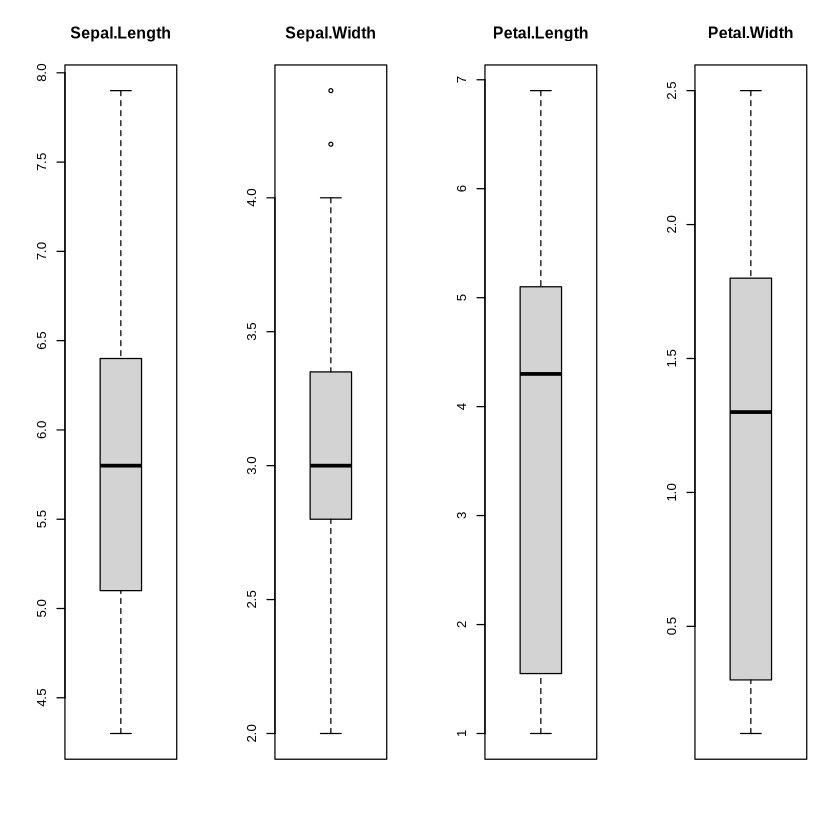

In [23]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

We can also create a barplot of the Species class variable to get a graphical representation of the class distribution (generally uninteresting in this case because they’re even).

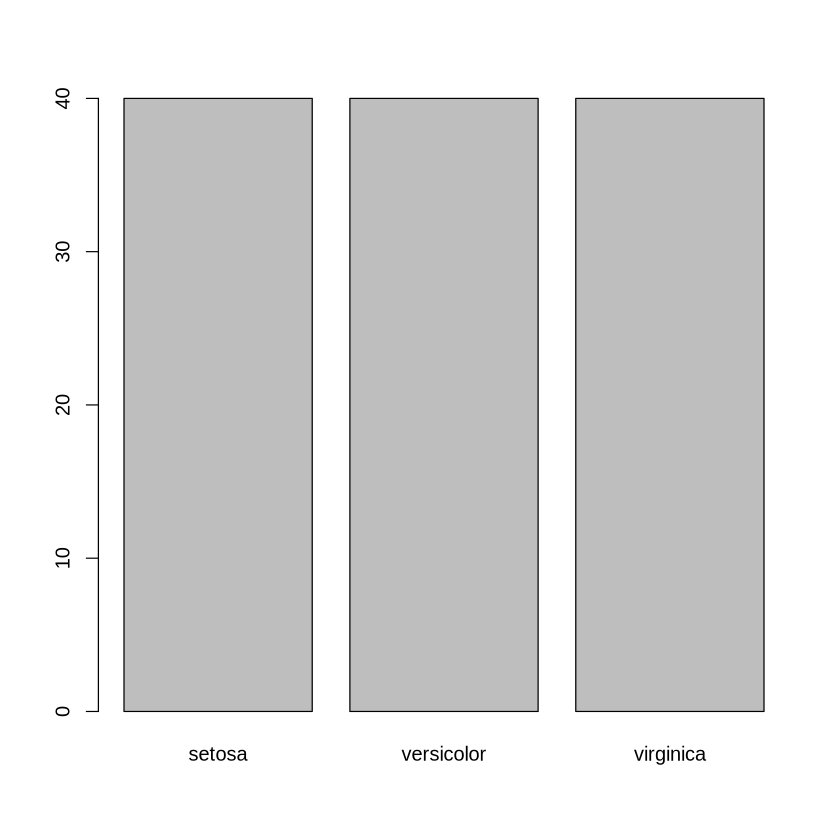

In [24]:
# barplot for class breakdown
plot(y)

This confirms what we learned in the last section, that the instances are evenly distributed across the three class:

### 4.2 Multivariate Plots
Now we can look at the interactions between the variables.

First let’s look at scatterplots of all pairs of attributes and color the points by class. In addition, because the scatterplots show that points for each class are generally separate, we can draw ellipses around them.

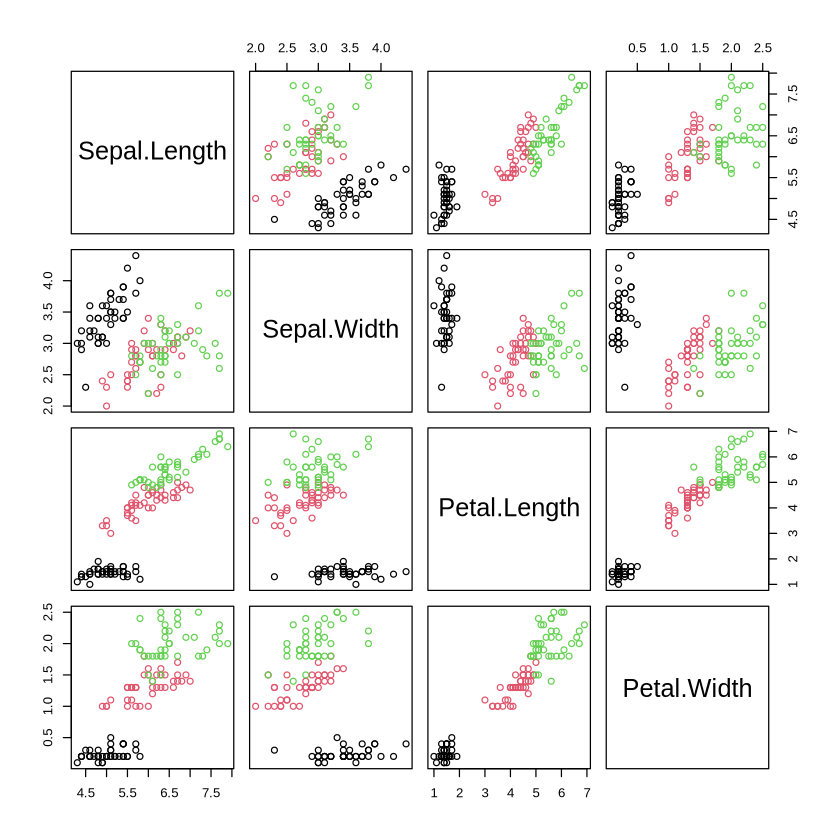

In [27]:
# scatterplot matrix
pairs(dataset[,1:4], col=dataset$Species)

We can see some clear relationships between the input attributes (trends) and between attributes and the class values (ellipses):

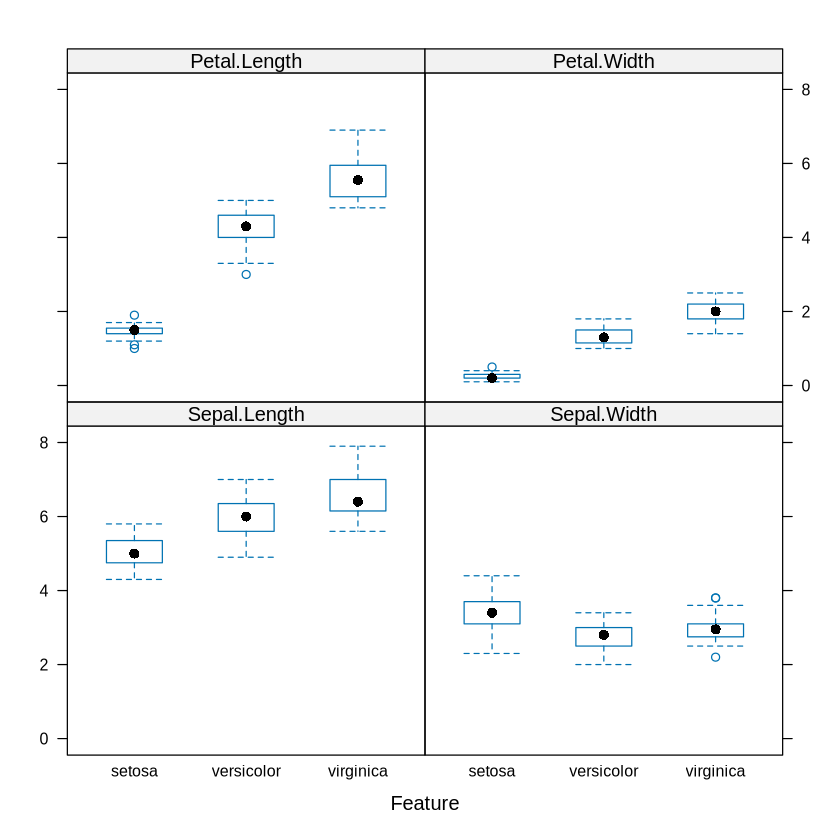

In [28]:
# box and whisker plots for each attribute
featurePlot(x=x, y=y, plot="box")

Next we can get an idea of the distribution of each attribute, again like the box and whisker plots, broken down by class value. Sometimes histograms are good for this, but in this case we will use some probability density plots to give nice smooth lines for each distribution.

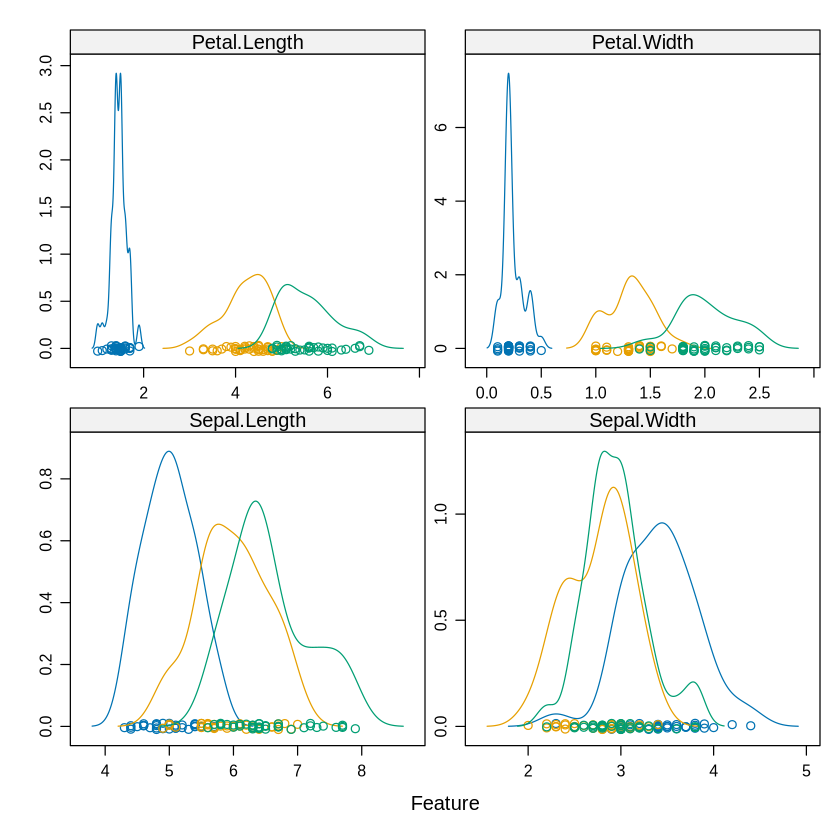

In [29]:
# density plots for each attribute by class value
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

Like the boxplots, we can see the difference in distribution of each attribute by class value. We can also see the Gaussian-like distribution (bell curve) of each attribute.

## 5. Evaluate Some Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.

Here is what we are going to cover in this step:  
1. Set-up the test harness to use 10-fold cross validation.
2. Build 5 different models to predict species from flower measurements.
3. Select the best model.

### 5.1 Test Harness
We will 10-fold crossvalidation to estimate accuracy.

This will split our dataset into 10 parts, train in 9 and test on 1 and release for all combinations of train-test splits. We will also repeat the process 3 times for each algorithm with different splits of the data into 10 groups, in an effort to get a more accurate estimate.

In [30]:
# Run algorithms using 10-fold cross validation
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

We are using the metric of “Accuracy” to evaluate models. This is a ratio of the number of correctly predicted instances in divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the metric variable when we run build and evaluate each model next.

### 5.2 Build Models
We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 5 different algorithms:  
- Linear Discriminant Analysis (LDA)  
- Classification and Regression Trees (CART).  
- k-Nearest Neighbors (kNN).  
- Support Vector Machines (SVM) with a linear kernel.  
- Random Forest (RF)

This is a good mixture of simple linear (LDA), nonlinear (CART, kNN) and complex nonlinear methods (SVM, RF). We reset the random number seed before reach run to ensure that the evaluation of each algorithm is performed using exactly the same data splits. It ensures the results are directly comparable.

Let’s build our five models:

In [34]:
install.packages("kernlab")
library(kernlab)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [35]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

Caret does support the configuration and tuning of the configuration of each model, but we are not going to cover that in this tutorial.

### 5.3 Select Best Model
We now have 5 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

We can report on the accuracy of each model by first creating a list of the created models and using the summary function.

In [36]:
# summarize accuracy of models
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
cart 0.8333333 0.9166667 0.9166667 0.9333333 0.9791667    1    0
knn  0.9166667 1.0000000 1.0000000 0.9833333 1.0000000    1    0
svm  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
rf   0.9166667 0.9375000 1.0000000 0.9750000 1.0000000    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.875 1.00000  1.000 0.9750 1.00000    1    0
cart 0.750 0.87500  0.875 0.9000 0.96875    1    0
knn  0.875 1.00000  1.000 0.9750 1.00000    1    0
svm  0.750 0.90625  1.000 0.9500 1.00000    1    0
rf   0.875 0.90625  1.000 0.9625 1.00000    1    0


We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).

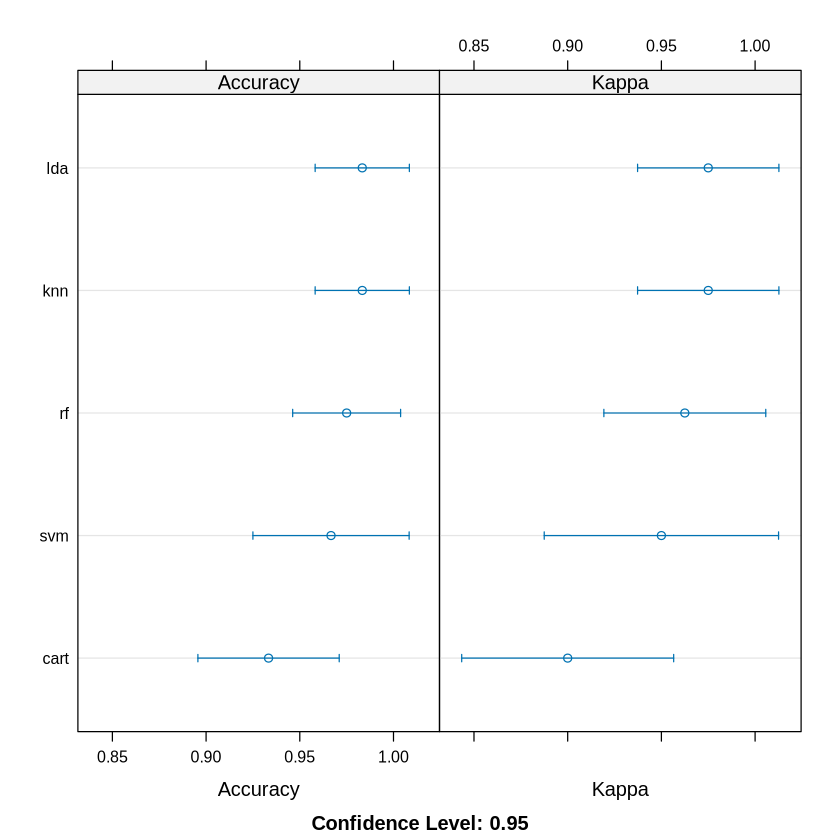

In [37]:
# compare accuracy of models
dotplot(results)

We can see that the most accurate model in this case was LDA.

The results for just the LDA model can be summarized.

In [38]:
# summarize Best Model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9833333  0.975



This gives a nice summary of what was used to train the model and the mean and standard deviation (SD) accuracy achieved, specifically 98.333% accuracy +/- 4%.

## 6. Make Predictions
The LDA was the most accurate model. Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during such as overfitting to the training set or a data leak. Both will result in an overly optimistic result.

We can run the LDA model directly on the validation set and summarize the results in a confusion matrix.

In [39]:
# estimate skill of LDA on the validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          9         0
  virginica       0          1        10

Overall Statistics
                                          
               Accuracy : 0.9667          
                 95% CI : (0.8278, 0.9992)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 2.963e-13       
                                          
                  Kappa : 0.95            
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9000           1.0000
Specificity                 1.0000            1.0000           0.9500
Pos Pred Value              1.0000            1.0000           0.9091
Neg Pred Value              1.0000            0.9524           1.0000
P

We can see that the accuracy is 96.67%. It was a small validation dataset (20%), but this result is within our expected margin of 97% +/-4% suggesting we may have an accurate and a reliably accurate model.

## Summary
In this post you discovered step-by-step how to complete your first machine learning project in R.

You discovered that completing a small end-to-end project from loading the data to making predictions is the best way to get familiar with a new platform.